In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Dataset 1
# Load the data into a pandas dataframe
true_df = pd.read_csv("/content/drive/MyDrive/Fake_News/data/True.csv")
fake_df = pd.read_csv("/content/drive/MyDrive/Fake_News/data/Fake.csv")

In [ ]:
#Dataset 2
t_df = pd.read_csv('/content/drive/MyDrive/Fake_News/data/train2.tsv', sep='\t', names = ['index', 'json', 'class', 'title','topic', 'publisher',
                                                                                          'rep','state','1','2','3','4','5','6',
                                                                                          'person','text'])

In [ ]:
#Dataset 3
val = t_df = pd.read_csv('/content/drive/MyDrive/Fake_News/data/val2.tsv', sep='\t', names = ['index', 'json', 'class', 'title','topic', 'publisher',
                                                                                          'rep','state','1','2','3','4','5','6',
                                                                                          'person','text'])

In [ ]:
#dataset 4
test = t_df = pd.read_csv('/content/drive/MyDrive/Fake_News/data/test2.tsv', sep='\t', names = ['index', 'json', 'class', 'title','topic', 'publisher',
                                                                                          'rep','state','1','2','3','4','5','6',
                                                                                          'person','text'])

In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_df.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
#check the number of subjects
fake_df['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
#check for unknown publishers
from logging import exception
unknown_publishers = []
for index, row in enumerate(true_df.text.values):
  try:
    record = row.split(' - ', maxsplit = 1)
    record[1]

    assert(len(record[0])<2120)
  except:
    unknown_publishers.append(index)

In [ ]:
true_df.iloc[unknown_publishers].text

2922    The following statements were posted to the ve...
3488    The White House on Wednesday disclosed a group...
3782    The following statements were posted to the ve...
4358    Neil Gorsuch, President Donald Trump’s appoint...
4465    WASHINGTON The clock began running out this we...
5290    The following statements were posted to the ve...
5588    The following statements were posted to the ve...
5761    The following bullet points are from the U.S. ...
5784    Federal appeals court judge Neil Gorsuch, the ...
6026    The following bullet points are from the U.S. ...
6184    The following bullet points are from the U.S. ...
6660    Republican members of Congress are complaining...
6823    Over the course of the U.S. presidential campa...
7922    After going through a week reminiscent of Napo...
8194    The following timeline charts the origin and s...
8195    Global health officials are racing to better u...
8247    U.S. President Barack Obama visited a street m...
8465    ALGONA

In [ ]:
publisher  = []
tmp_text = []

for index, row in enumerate(true_df.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-', maxsplit = 1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
true_df['publisher'] = publisher
true_df['text'] = tmp_text

In [ ]:
true_df.shape

(21417, 5)

In [ ]:
empty_df_f = [index for index, text in enumerate( fake_df.text.tolist()) if str(text).strip()==""]

In [ ]:
#remove the unknown publishers
fake_df.iloc[empty_df_f]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
#joinining the texts and titles
true_df['text'] = true_df['title']+ " "+ true_df['text']
true_df['text'] = true_df['title']+ " "+ true_df['text']

In [ ]:
true_df['text'] = true_df['text'].apply(lambda x: str(x).lower())

In [ ]:
true_df['class'] = 1
fake_df['class'] = 0

In [ ]:
df = true_df.append(fake_df, ignore_index = True)

<ipython-input-21-4a84c9ff6e42>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = true_df.append(fake_df, ignore_index = True)


In [ ]:
df = df.drop(['title','subject','date','publisher'], axis = 1)

In [ ]:
df.shape

(44898, 2)

In [ ]:
df.sample(5)

,text,class
11064,republicans raise concerns on visa waiver bill...,1
32297,What a nut job! A 10th-grade teacher invited r...,0
4514,"with coons, democrats have enough votes to fil...",1
15797,spanish judge orders custody for catalan leade...,1
6132,investors gird for impact of trump healthcare ...,1


In [ ]:
t_df.head()

,index,json,class,title,topic,publisher,rep,state,1,2,3,4,5,6,person,text
0,0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,"Meantime, engineering experts agree the wall w..."
1,1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,She cited layoff notices received by the state...
2,2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,"Trump said that McCain ""has done nothing to he..."
3,3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,"But spending still goes up. In addition, many ..."
4,4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,Our rating A Democratic Party web video making...


##Working of dataset 2

In [ ]:
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

In [ ]:
df2 = t_df.drop(['index','json','title','topic','publisher','rep','state','1','2','3','4','5','6','person'], axis =1)

In [ ]:
#extract true from the dataset
true_df = df2[df2['class'] == 'true']

In [ ]:
#switch columns
true_df = df_column_switch(true_df, "class", "text")

In [ ]:
true_df['text'] = true_df['text'].apply(lambda x: str(x).lower())

In [ ]:
#extract fake from the dataset
fake_df = df2[df2['class'] == 'false']

In [ ]:
fake_df['text'] = fake_df['text'].apply(lambda x: str(x).lower())

<ipython-input-32-e127a439346e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df['text'] = fake_df['text'].apply(lambda x: str(x).lower())


In [ ]:
true_df['class'] = 1
fake_df['class'] = 0

<ipython-input-33-b873194fe3e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df['class'] = 0


In [ ]:
fake_df = df_column_switch(fake_df, "class", "text")

In [ ]:
#concat the fake to the main data
df = df.append(fake_df, ignore_index = True)

<ipython-input-35-a3c483579aa7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fake_df, ignore_index = True)


In [ ]:
#concat the true to main data
df = df.append(true_df, ignore_index = True)

<ipython-input-36-d61583c44646>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(true_df, ignore_index = True)


In [ ]:
df.shape

(45355, 2)

#taking titles as well


In [ ]:
df2 = t_df.drop(['index','json','text','topic','publisher','rep','state','1','2','3','4','5','6','person'], axis =1)

In [ ]:
#extract true from the dataset
true_df = df2[df2['class'] == 'true']

In [ ]:
#switch columns
true_df = df_column_switch(true_df, "class", "title")

In [ ]:
true_df['title'] = true_df['title'].apply(lambda x: str(x).lower())

In [ ]:
true_df.rename(columns = {'title':'text'}, inplace = True)

In [ ]:
#extract fake from the dataset
fake_df = df2[df2['class'] == 'false']

In [ ]:
#switch columns
fake_df = df_column_switch(fake_df, "class", "title")

In [ ]:
fake_df['title'] = fake_df['title'].apply(lambda x: str(x).lower())

In [ ]:
fake_df.rename(columns = {'title':'text'}, inplace = True)

In [ ]:
true_df['class'] = 1
fake_df['class'] = 0

In [ ]:
#concat the fake to the main data
df = df.append(fake_df, ignore_index = True)

<ipython-input-48-a3c483579aa7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fake_df, ignore_index = True)


In [ ]:
#concat the true to main data
df = df.append(true_df, ignore_index = True)

<ipython-input-49-d61583c44646>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(true_df, ignore_index = True)


In [ ]:
df.shape

(45812, 2)

##working on the dataset 3

In [ ]:
df3 = val.drop(['index','json','title','topic','publisher','rep','state','1','2','3','4','5','6','person'], axis =1)

In [ ]:
#extract true from the dataset
true_df = df3[df3['class'] == 'true']

In [ ]:
#switch columns
true_df = df_column_switch(true_df, "class", "text")

In [ ]:


true_df['text'] = true_df['text'].apply(lambda x: str(x).lower())

In [ ]:
#extract fake from the dataset
fake_df = df3[df3['class'] == 'false']

In [ ]:
#switch columns
fake_df = df_column_switch(fake_df, "class", "text")

In [ ]:
true_df['text'] = true_df['text'].apply(lambda x: str(x).lower())

In [ ]:
true_df['class'] = 1
fake_df['class'] = 0

In [ ]:
#concat the fake to the main data
df = df.append(fake_df, ignore_index = True)

<ipython-input-59-a3c483579aa7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fake_df, ignore_index = True)


In [ ]:
#concat the true to main data
df = df.append(true_df, ignore_index = True)

<ipython-input-60-d61583c44646>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(true_df, ignore_index = True)


In [ ]:
df.shape

(46244, 2)

##Taking title as well on dataset 3

In [ ]:
df3 = val.drop(['index','json','text','topic','publisher','rep','state','1','2','3','4','5','6','person'], axis =1)

In [ ]:
#extract true from the dataset
true_df = df3[df3['class'] == 'true']

In [ ]:
#switch columns
true_df = df_column_switch(true_df, "class", "title")

In [ ]:
true_df['title'] = true_df['title'].apply(lambda x: str(x).lower())

In [ ]:
true_df.rename(columns = {'title':'text'}, inplace = True)

In [ ]:
#extract fake from the dataset
fake_df = df3[df3['class'] == 'false']

In [ ]:
#switch columns
fake_df = df_column_switch(fake_df, "class", "title")

In [ ]:
fake_df['title'] = fake_df['title'].apply(lambda x: str(x).lower())

In [ ]:
fake_df.rename(columns = {'title':'text'}, inplace = True)

In [ ]:
true_df['class'] = 1
fake_df['class'] = 0

In [ ]:
#concat the fake to the main data
df = df.append(fake_df, ignore_index = True)

<ipython-input-72-a3c483579aa7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fake_df, ignore_index = True)


In [ ]:
#concat the true to main data
df = df.append(true_df, ignore_index = True)

<ipython-input-73-d61583c44646>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(true_df, ignore_index = True)


In [ ]:
df.shape

(46676, 2)

#Working on dataset 4

In [ ]:
df4 = test.drop(['index','json','title','topic','publisher','rep','state','1','2','3','4','5','6','person'], axis =1)

In [ ]:
#extract true from the dataset
true_df = df4[df4['class'] == 'true']

In [ ]:
#switch columns
true_df = df_column_switch(true_df, "class", "text")

In [ ]:
true_df['text'] = true_df['text'].apply(lambda x: str(x).lower())

In [ ]:
#extract fake from the dataset
fake_df = df4[df4['class'] == 'false']

In [ ]:
#switch columns
fake_df = df_column_switch(fake_df, "class", "text")

In [ ]:
true_df['text'] = true_df['text'].apply(lambda x: str(x).lower())

In [ ]:
true_df['class'] = 1
fake_df['class'] = 0

In [ ]:
#concat the fake to the main data
df = df.append(fake_df, ignore_index = True)

<ipython-input-83-a3c483579aa7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fake_df, ignore_index = True)


In [ ]:
#concat the true to main data
df = df.append(true_df, ignore_index = True)

<ipython-input-84-d61583c44646>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(true_df, ignore_index = True)


In [ ]:
df.shape

(47133, 2)

##Taking titles as well

In [ ]:
df4 = test.drop(['index','json','text','topic','publisher','rep','state','1','2','3','4','5','6','person'], axis =1)

In [ ]:
#extract true from the dataset
true_df = df4[df4['class'] == 'true']

In [ ]:
#switch columns
true_df = df_column_switch(true_df, "class", "title")

In [ ]:
true_df['title'] = true_df['title'].apply(lambda x: str(x).lower())

In [ ]:
true_df.rename(columns = {'title':'text'}, inplace = True)

In [ ]:
#extract fake from the dataset
fake_df = df4[df4['class'] == 'false']

In [ ]:
#switch columns
fake_df = df_column_switch(fake_df, "class", "title")

In [ ]:
fake_df['title'] = fake_df['title'].apply(lambda x: str(x).lower())

In [ ]:
fake_df.rename(columns = {'title':'text'}, inplace = True)

In [ ]:
true_df['class'] = 1
fake_df['class'] = 0

In [ ]:

#concat the fake to the main data
df = df.append(fake_df, ignore_index = True)

<ipython-input-96-a3c483579aa7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fake_df, ignore_index = True)


In [ ]:
#concat the true to main data
df = df.append(true_df, ignore_index = True)

<ipython-input-97-d61583c44646>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(true_df, ignore_index = True)


In [ ]:
df.shape

(47590, 2)

In [ ]:
df.head()

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


##More Cleaning

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-kqahxsdy
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-kqahxsdy
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7639 sha256=0f934dccad68e333e9ca997d0c5da58aec4f0457c22e67691984dfcf6ad0c935
  Stored in directory: /tmp/pip-ephem-wheel-cache-kjfaw263/wheels/d1/c3/bb/559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
type(df['text'])

pandas.core.series.Series

In [ ]:
df.isna().sum()

text     1
class    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(47589, 2)

In [ ]:
df['text'].apply(lambda x: ps.remove_special_chars(x))

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
47585    in the illinois legislature barack obama voted...
47586    if you want to vote in texas you can use a con...
47587    the us supreme court has not traditionally ask...
47588    says barack obama promised to halve the defici...
47589    i am the only senator who turned down the stat...
Name: text, Length: 47589, dtype: object

##Pre Process

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# Tokenize the text by splitting it into individual words
df['text'] = df['text'].apply(lambda x: x.split())

In [ ]:
# Remove stopwords from the text
nltk.download('stopwords')
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Stem the words in the text
stemmer = PorterStemmer()
df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
# Lemmatize the words in the text
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Join the words back into a single string
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [ ]:
df.isna().sum()

text     0
class    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df['text'].apply(lambda x: ps.remove_special_chars(x))

0        us budget fight looms republican flip fiscal s...
1        us militari accept transgend recruit monday pe...
2        senior us republican senator let mr mueller jo...
3        fbi russia probe help australian diplomat tipo...
4        trump want postal servic charg much more amazo...
                               ...                        
47585    illinoi legislature barack obama vote present ...
47586    want vote texas use concealedweapon permit val...
47587    us suprem court tradit ask lot question oral a...
47588      say barack obama promis halv deficit first term
47589    senat turn state pension plan parttim legislators
Name: text, Length: 47589, dtype: object

In [ ]:
# Save the preprocessed dataset
df.to_csv('preprocessed_dataset.csv', index=False)

##fine tuning model - BERT

Fine-tuning BERT: Fine-tune the pre-trained BERT model on the preprocessed dataset using transfer learning. You can use a binary classification task to train the BERT model to distinguish between real and fake news articles.

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


In [ ]:
!pip install transformers

import pandas as pd
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 26.0 MB/s eta 0:00:00


In [ ]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

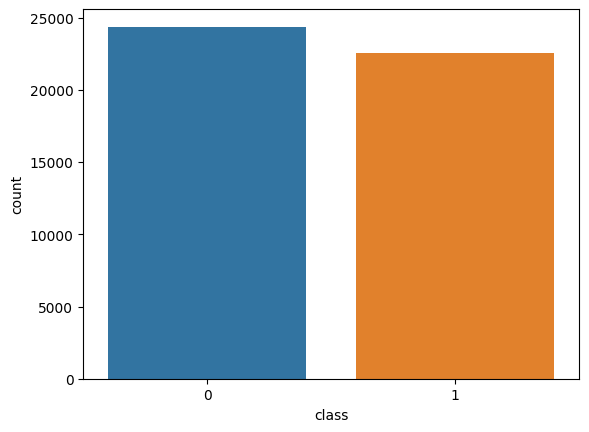

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.show()


In [ ]:
df.isna().sum()

text     634
class      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df['text'].apply(lambda x: ps.remove_special_chars(x))

0        us budget fight looms republican flip fiscal s...
1        us militari accept transgend recruit monday pe...
2        senior us republican senator let mr mueller jo...
3        fbi russia probe help australian diplomat tipo...
4        trump want postal servic charg much more amazo...
                               ...                        
47584    illinoi legislature barack obama vote present ...
47585    want vote texas use concealedweapon permit val...
47586    us suprem court tradit ask lot question oral a...
47587      say barack obama promis halv deficit first term
47588    senat turn state pension plan parttim legislators
Name: text, Length: 46955, dtype: object

In [ ]:
# Split the dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['class'], test_size=0.2, random_state=42)

In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
# Convert NumPy arrays to lists
train_texts = list(train_texts)
test_texts = list(test_texts)

In [ ]:
# Tokenize the train and test sets
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [ ]:
# Convert the train and test labels to tensors
train_labels = torch.tensor(list(train_labels))
test_labels = torch.tensor(list(test_labels))

In [ ]:
# Create a PyTorch DataLoader for the train and test sets
train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']), torch.tensor(train_encodings['attention_mask']), train_labels)
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']), torch.tensor(test_encodings['attention_mask']), test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
test_dataset

In [ ]:
# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# Set the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


#Model Definition

In [ ]:
# Fine-tune the model on the train set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, hidden_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.hidden_size = hidden_size
        self.num_heads = num_heads
        self.head_size = hidden_size // num_heads

        self.query = nn.Linear(hidden_size, hidden_size)
        self.key = nn.Linear(hidden_size, hidden_size)
        self.value = nn.Linear(hidden_size, hidden_size)
        self.projection = nn.Linear(hidden_size, hidden_size)

    def forward(self, inputs):
        batch_size = inputs.size(0)

        # Linear transformations
        Q = self.query(inputs).view(batch_size, -1, self.num_heads, self.head_size).transpose(1,2)
        K = self.key(inputs).view(batch_size, -1, self.num_heads, self.head_size).transpose(1,2)
        V = self.value(inputs).view(batch_size, -1, self.num_heads, self.head_size).transpose(1,2)

        # Scaled Dot-Product Attention
        attention_scores = torch.matmul(Q, K.transpose(-1,-2)) / self.head_size**0.5
        attention_probs = F.softmax(attention_scores, dim=-1)
        context = torch.matmul(attention_probs, V).transpose(1,2).contiguous().view(batch_size, -1, self.hidden_size)

        # Output projection
        output = self.projection(context)
        return output

class model(nn.Module):
    def __init__(self, bert_model, num_classes):
        super(FakeNewsDetector, self).__init__()
        self.bert = bert_model
        self.attention = MultiHeadAttention(bert_model.config.hidden_size, num_heads=4)
        self.cnn = nn.Conv1d(bert_model.config.hidden_size, bert_model.config.hidden_size, kernel_size=3, padding=1)
        self.classifier = nn.Linear(bert_model.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0]  # output shape: (batch_size, seq_length, hidden_size)
        attn_output = self.attention(bert_output)  # output shape: (batch_size, seq_length, hidden_size)  #self Attention
        cnn_output = self.cnn(attn_output.permute(0,2,1)).permute(0,2,1)  # output shape: (batch_size, seq_length, hidden_size) #CNN Layer
        cls_output = cnn_output[:, 0, :]  # take the first token as the output
        logits = self.classifier(cls_output)  # output shape: (batch_size, num_classes)
        return logits


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

##Training loop

In [ ]:
epochs = 2

for epoch in range(epochs):
    model.train()

    train_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

    scheduler.step()

    print('Epoch: {}, Train Loss: {:.3f}'.format(epoch+1, train_loss/len(train_loader)))


Epoch: 1, Train Loss: 0.052
Epoch: 2, Train Loss: 0.022


##Evaluation Loop

In [ ]:
# Evaluate the model on the test set
##run this if youre training for the first time
model.eval()

test_loss = 0
predictions = []

for batch in test_loader:
    with torch.no_grad():
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        test_loss += loss.item()

        logits = outputs.logits.detach().cpu().numpy()
        predictions.extend(np.argmax(logits, axis=1))

test_accuracy = np.mean(predictions == test_labels.numpy())
print('Test Accuracy: {:.3f}'.format(test_accuracy))

In [ ]:
##run this if you load the save model
model.eval()

test_loss = 0
predictions = []

for batch in test_loader:
    with torch.no_grad():
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        # move the model to the same device as the inputs
        model = model.to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        test_loss += loss.item()

        logits = outputs.logits.detach().cpu().numpy()
        predictions.extend(np.argmax(logits, axis=1))

test_accuracy = np.mean(predictions == test_labels.numpy())
print('Test Accuracy: {:.3f}'.format(test_accuracy))


Test Accuracy: 0.977


In [ ]:
##uncomment the below line if you trained the model and not loaded the saved one
#model.save_pretrained("MODEL_BERT")

In [ ]:
#save the pretrained and fine tuned weights
#torch.save(model.state_dict(), 'weights.pth')


In [ ]:
#load the pretrained fine tuned BERT model
model = model.from_pretrained('/content/drive/MyDrive/Fake_News/model_bert+FINETUNED')

#evaluation plots

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

def evaluate(model, dataloader):
    y_true = []
    y_pred = []
    model.eval()
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits.detach().cpu().numpy()
            preds = np.argmax(logits, axis=1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds)
    conf_matrix = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return conf_matrix, f1, recall, precision




In [ ]:
conf_matrix, f1, recall, precision = evaluate(model, test_loader)
print('Confusion Matrix:')
print(conf_matrix)
print('F1 Score: {:.3f}'.format(f1))
print('Recall: {:.3f}'.format(recall))
print('Precision: {:.3f}'.format(precision))

Confusion Matrix:
[[4826   59]
 [ 155 4351]]
F1 Score: 0.976
Recall: 0.966
Precision: 0.987


In [ ]:
import matplotlib.pyplot as plt

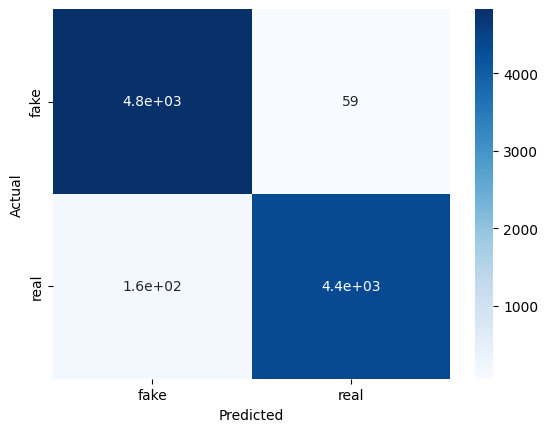

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming model predictions are in the variable 'preds'
cm = conf_matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
df.shape

(46955, 2)

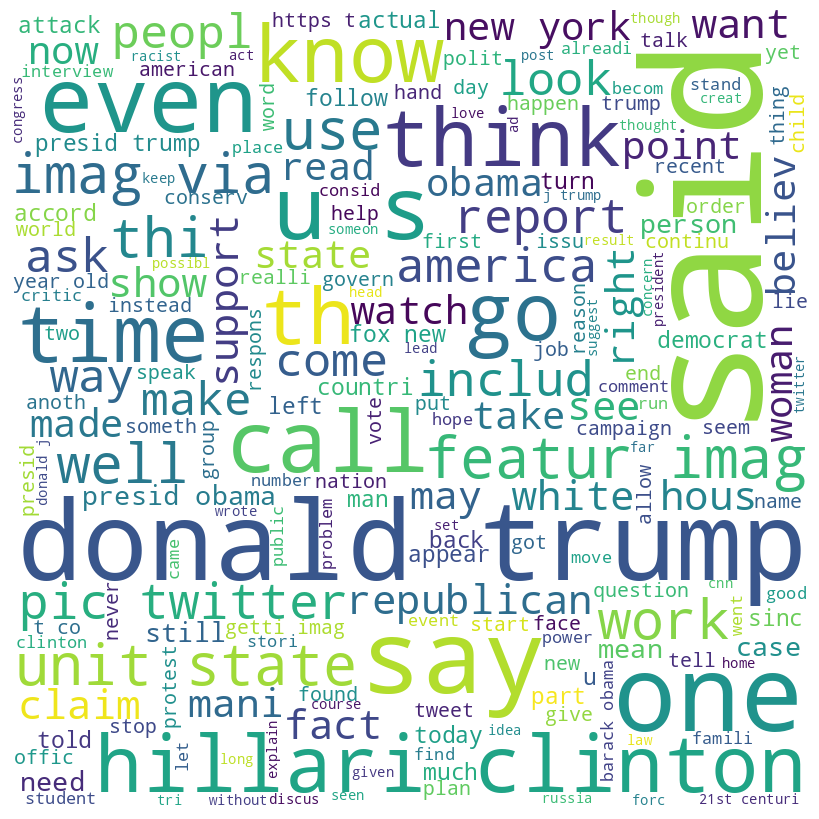

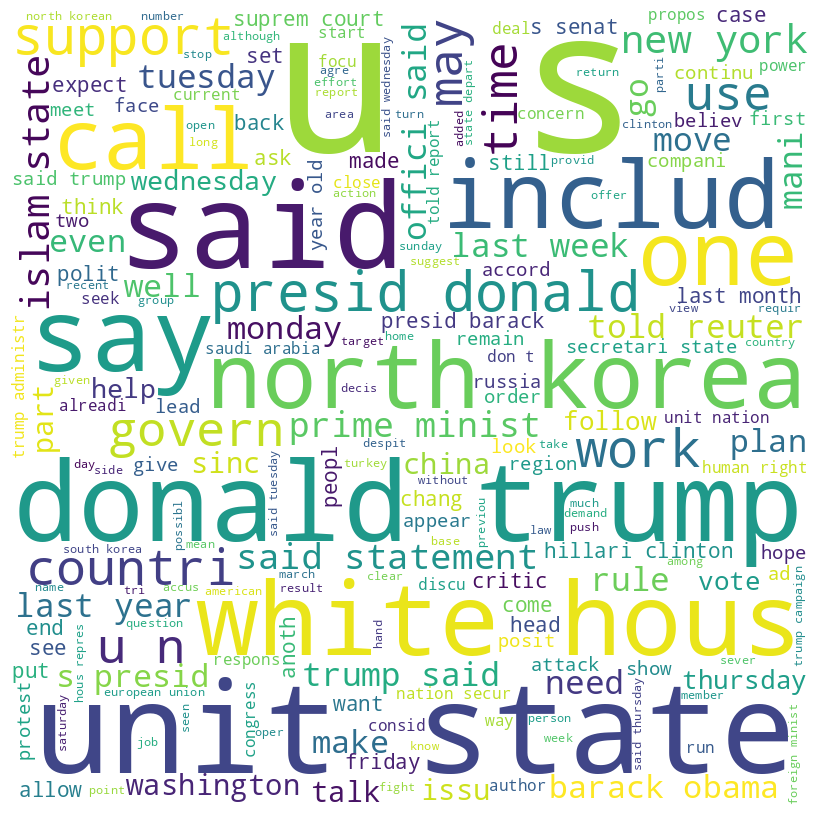

In [ ]:
from wordcloud import WordCloud

fake_data = df[df['class'] == 0]
fake_text = ' '.join(fake_data['text'].tolist())
fake_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(fake_text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(fake_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

real_data = df[df['class'] == 1]
real_text = ' '.join(real_data['text'].tolist())
real_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(real_text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(real_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

model.eval()
y_true = test_labels.numpy()
y_scores = []

for batch in test_loader:
    with torch.no_grad():
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        logits = outputs.logits.detach().cpu().numpy()
        probs = np.exp(logits) / np.exp(logits).sum(axis=1, keepdims=True)
        y_scores.extend(probs[:, 1])

roc_auc = roc_auc_score(y_true, y_scores)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)



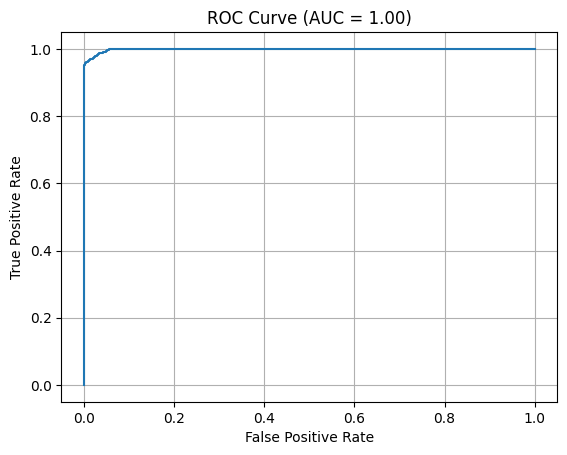

In [ ]:
# Plot ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


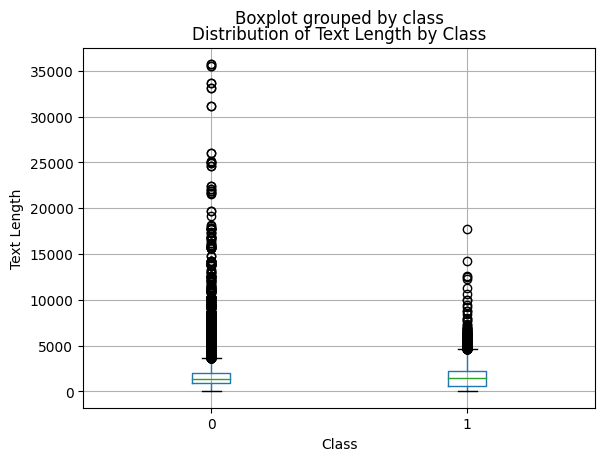

In [ ]:
# Box plot of text length
df['text_length'] = df['text'].apply(len)
df.boxplot(column='text_length', by='class')
plt.title('Distribution of Text Length by Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()

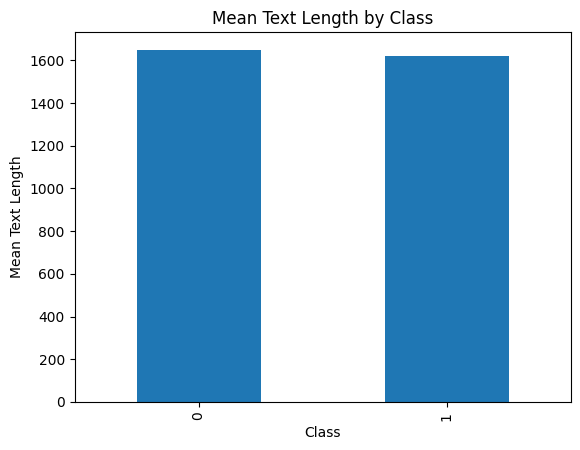

In [ ]:
# Group data by class and calculate mean text length
class_text_length = df.groupby('class')['text_length'].mean()

# Create bar chart
class_text_length.plot(kind='bar')
plt.title('Mean Text Length by Class')
plt.xlabel('Class')
plt.ylabel('Mean Text Length')
plt.show()


#Test on new input Text

In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Input text
text = "The US believes the UN Secretary General is too willing to accommodate Russian interests, according to fresh revelations in classified documents leaked online."

# Tokenize the input text
encoding = tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=128,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt'
)

# Get the model prediction
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
logits = outputs.logits.detach().cpu().numpy()
prediction = np.argmax(logits)

# Print the prediction
if prediction == 0:
    print("Negative")
else:
    print("Positive")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Negative


#Test on new Texts

In [ ]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define a function to classify new input text
def classify_text(text):
    # Tokenize the input text
    encoding = tokenizer(text, return_tensors='pt')

    # Move the input to the device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Make a prediction
    with torch.no_grad():
        output = model(input_ids, attention_mask=attention_mask)
        logits = output.logits.detach().cpu().numpy()
        prediction = np.argmax(logits)

    return prediction

# Test the function on some input text
text1 = "The US believes the UN Secretary General is too willing to accommodate Russian interests, according to fresh revelations in classified documents leaked online."
text2 = "Western Australia is bracing for the arrival of a major storm which could bring very destructive winds of up to 275 km/h (170 mph)."
text3 = "The acting was amazing, but the plot was confusing."

print(classify_text(text1))
print(classify_text(text2))
print(classify_text(text3))

0
1
0
